# Feedback
## Exercise 1
1. ok 1/1
2. muy bien 1/1
3. you're right 1/1

## Exercise 2
1. muy bien 1/1
2. en la gráficas individualistas creo que están bien las superficies pero no en la versión cuando tienen todo juntos. Por qué no simplemente cambiaron la lógica del ciclo para tenerlo todo dentro de una gráfica? 1.5/2
3. muy bien 1/1

## Exercise 3
así es 1/1

Total: 1 + 1 + 1 + 1 + 1.5 + 1 + 1 = 7.5/8

# Universidad de La Sabana 

**Felix Mohr**

## Facultad de Ingenería 2022.2
Supervised Machine Learning


- Gerson Barrera
- Santiago Merchán
- Rodrigo Carranza

#**Exercise 1(3 points)** 
Suppose that we model, for any instance x, the log-odds ratio between
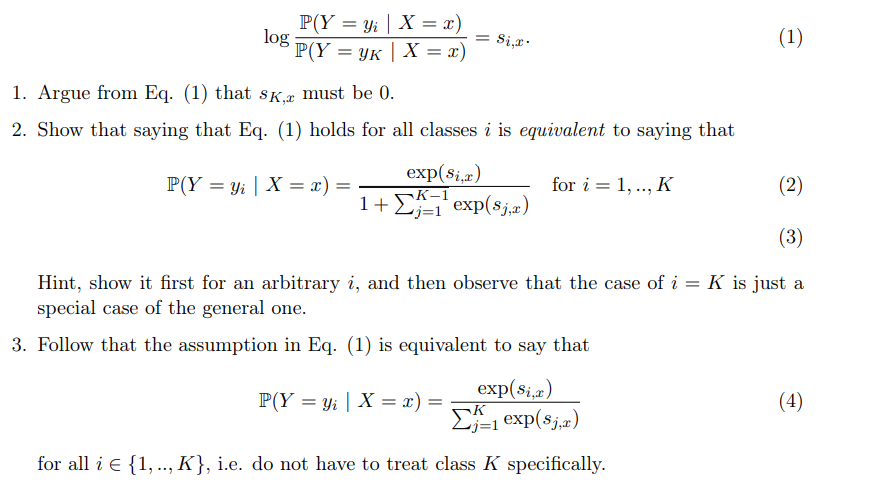


Ejercicio 1. Punto 1

1.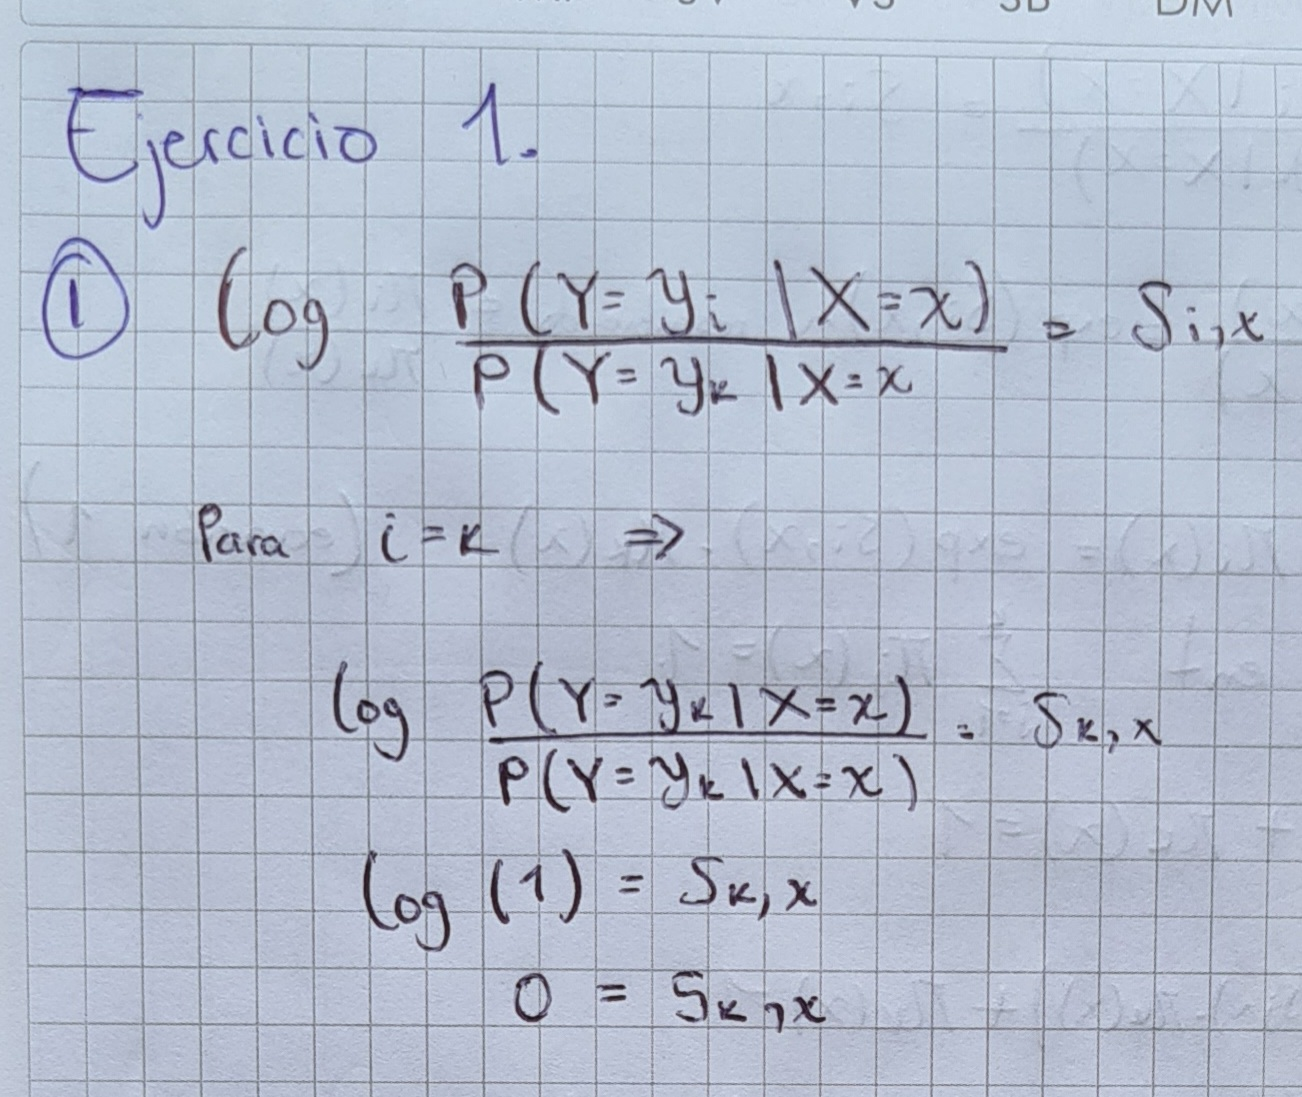


Ejercicio 1 punto 2.

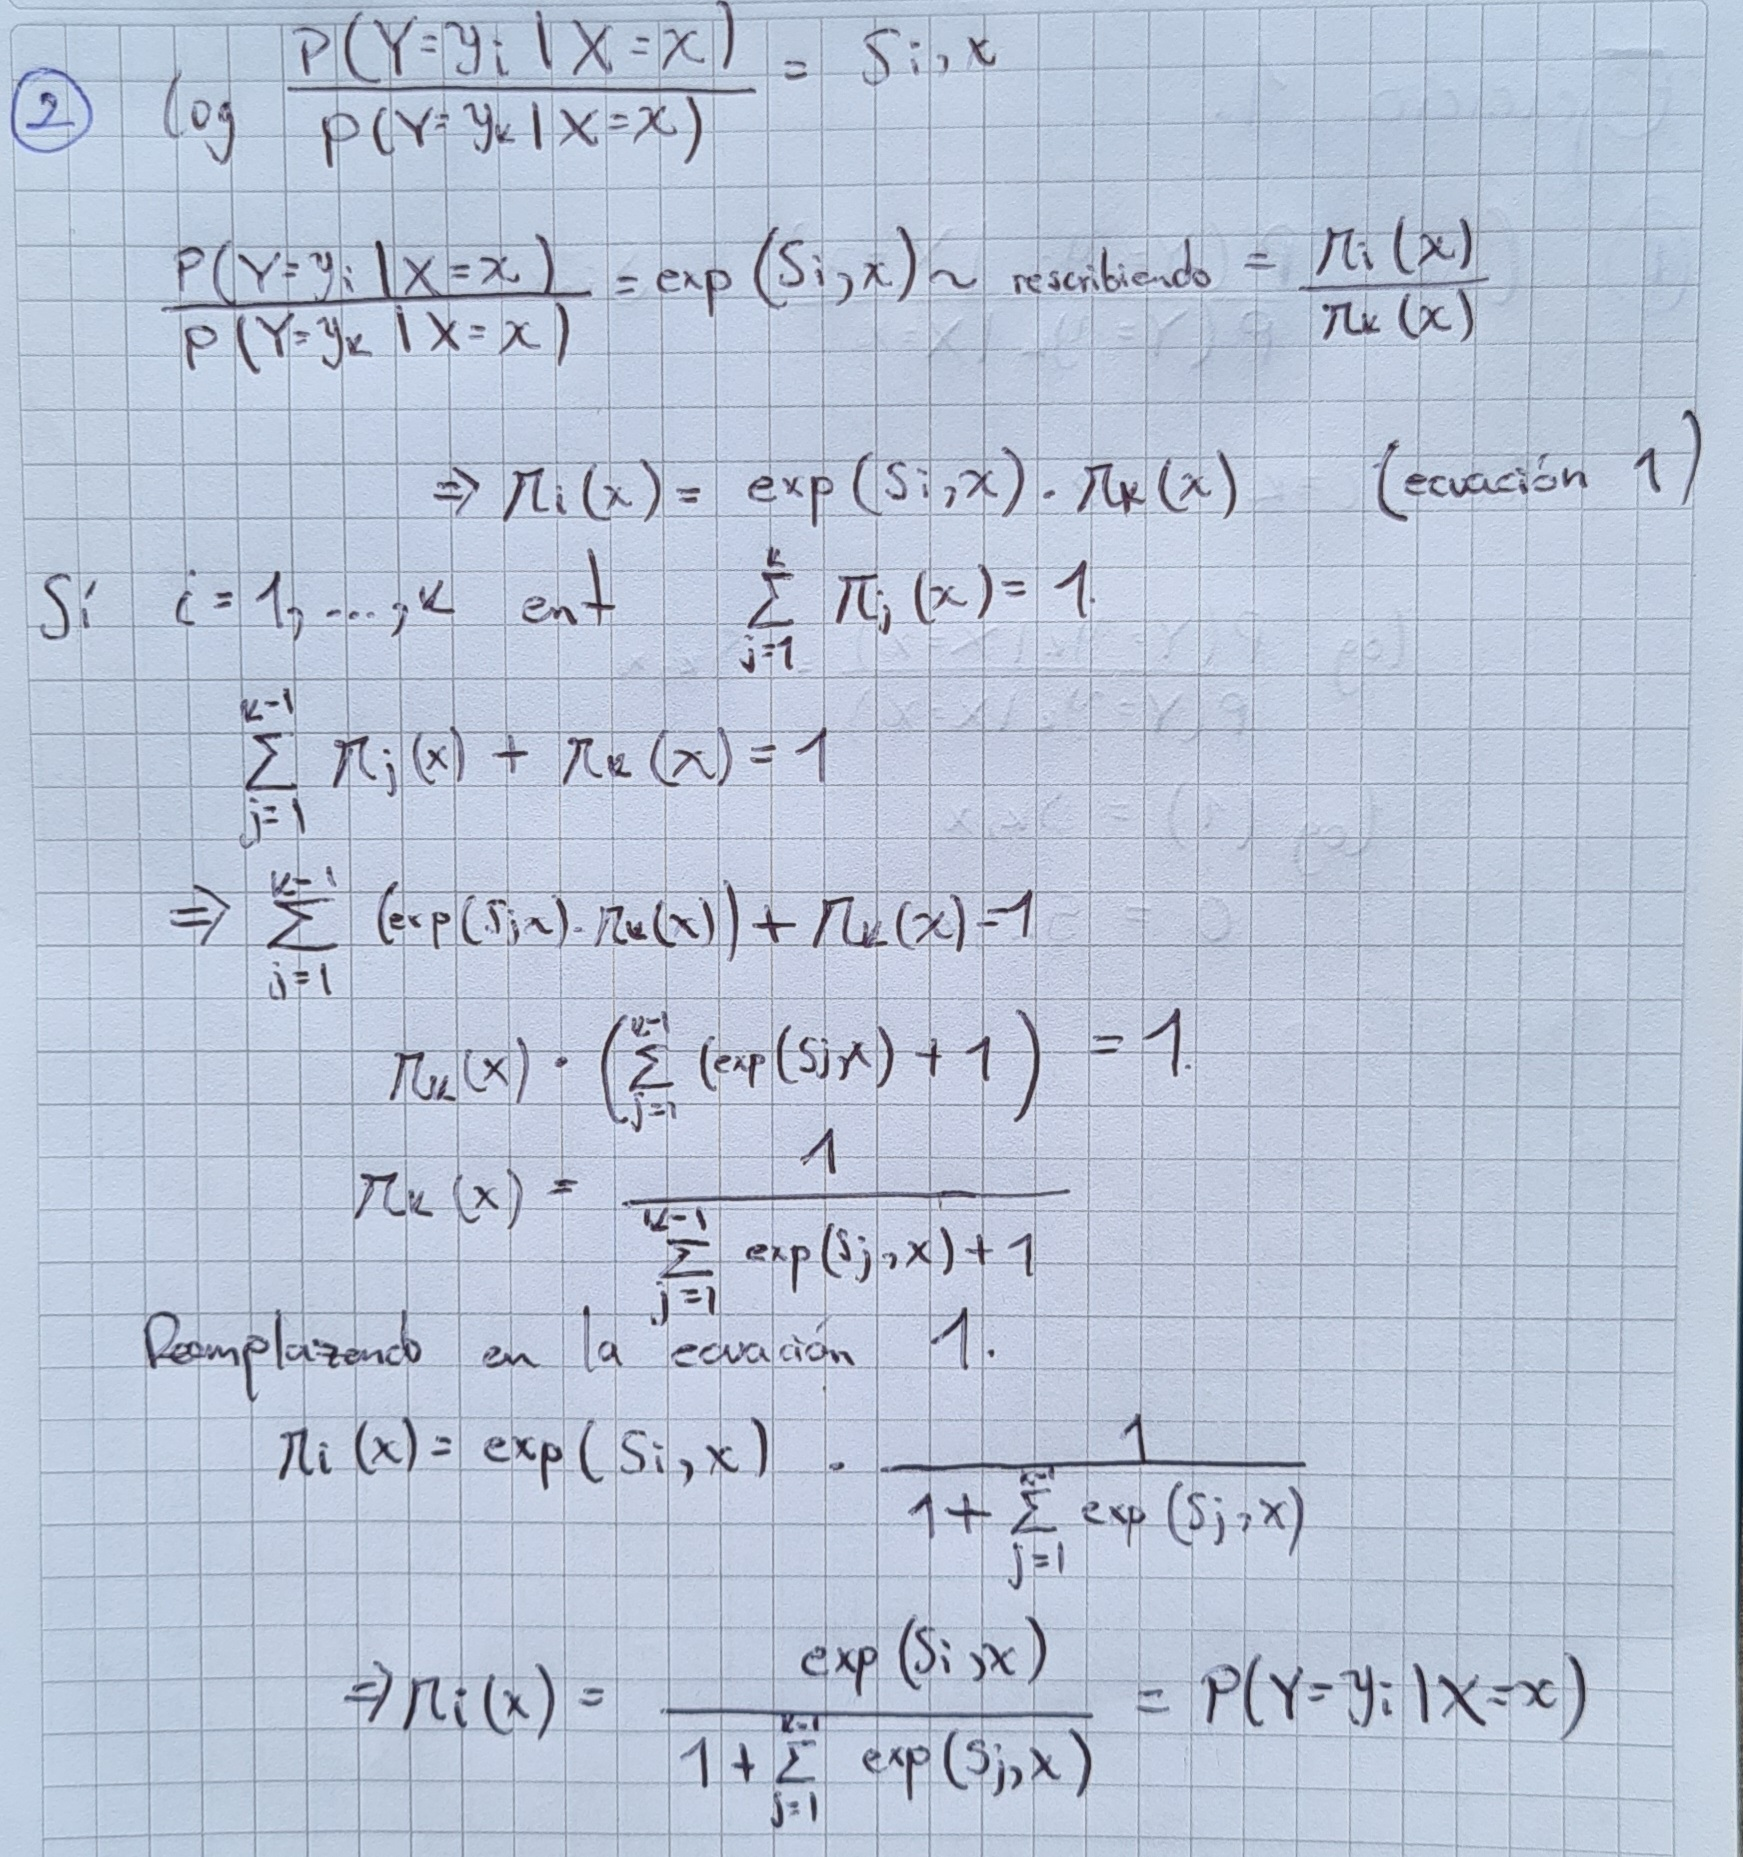

Ejercicio 1. Punto 3. 

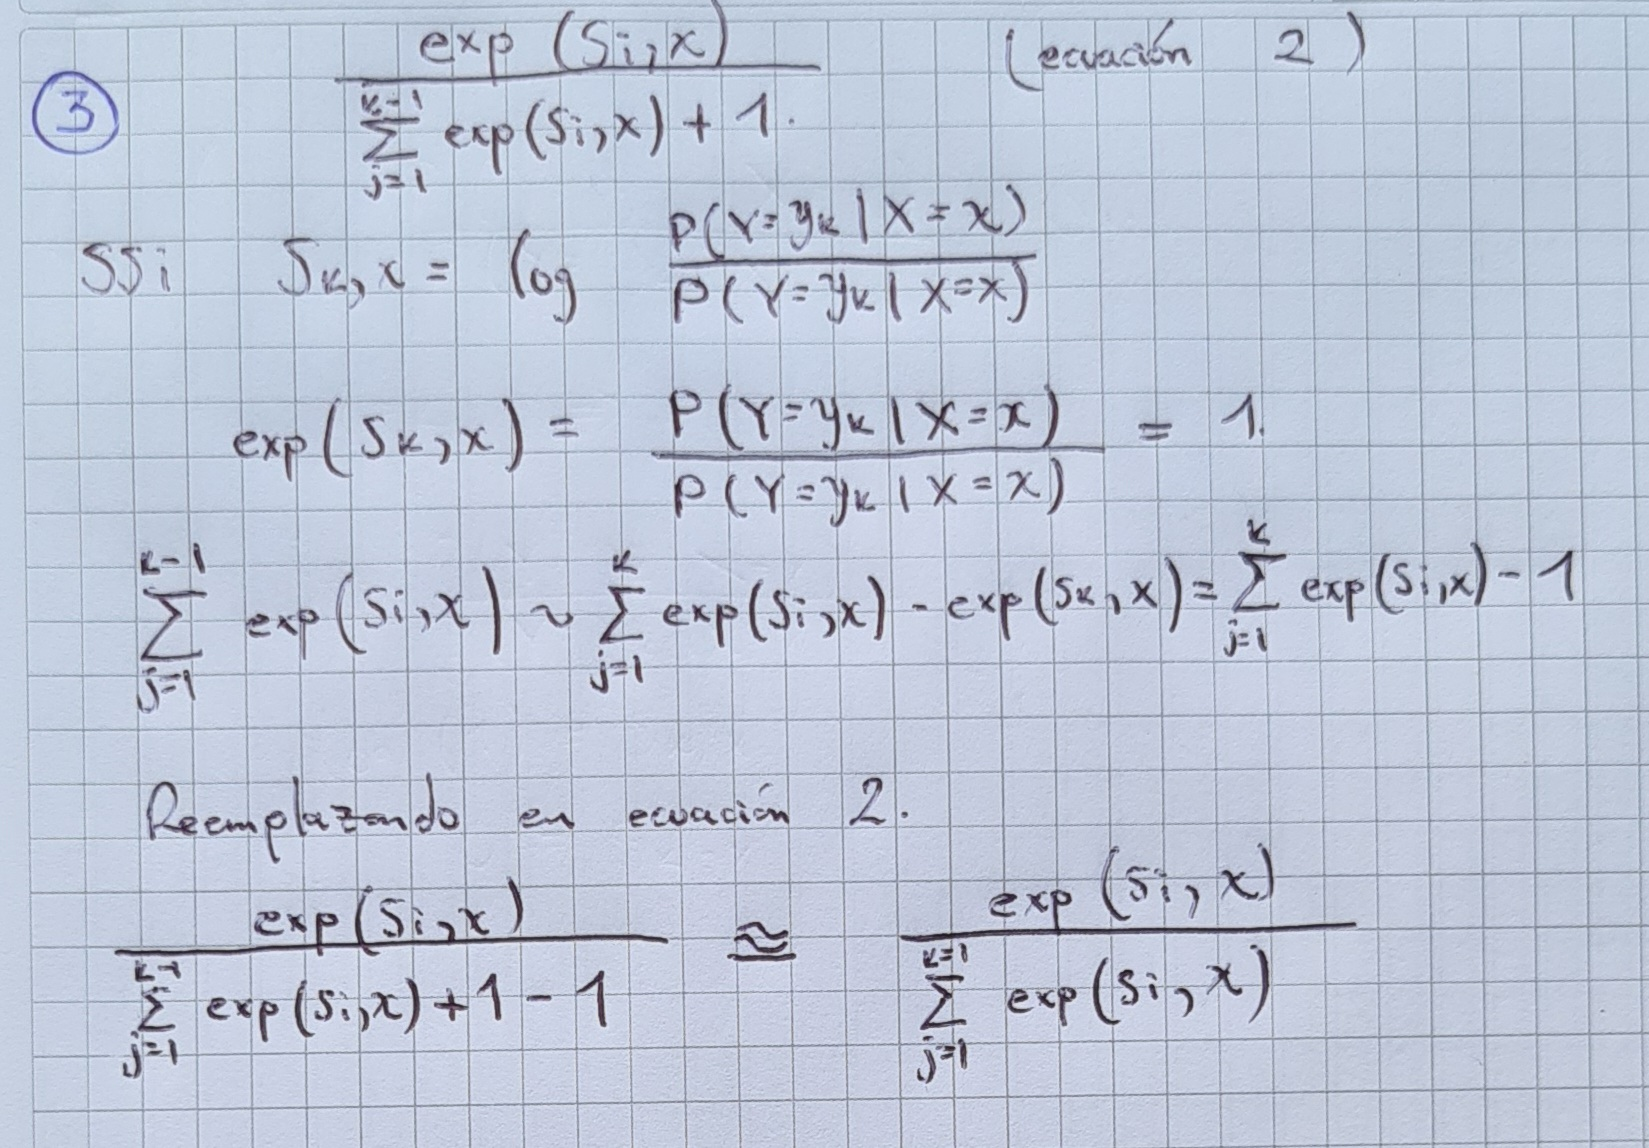

Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn import datasets
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap


In [2]:
import numpy as np
import pandas as pd
import scipy.linalg
import scipy.stats
from scipy.stats import norm as normal
import matplotlib.pyplot as plt
import sklearn.datasets
import sklearn.discriminant_analysis
from sklearn.model_selection import train_test_split
import sklearn.tree
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
import sklearn.datasets as dfs
import sklearn.metrics
from numpy import percentile
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from pprint import pprint
import seaborn as sns
import plotly.graph_objs as go
import plotly.express as px
from numpy import linspace
import random
%matplotlib inline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import power_transform 
from sklearn.preprocessing import Normalizer
import numpy as np
import matplotlib.pyplot as plt
from future.utils import iteritems
from datetime import datetime
from scipy.stats import norm
from scipy.stats import multivariate_normal as mvn

In [3]:
#Modeling
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


#Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

#Metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss
from sklearn.metrics import brier_score_loss

#Model Selection
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

import warnings
warnings.filterwarnings("ignore")

import sklearn.tree
import pandas as pd
import sklearn.datasets
import random
from random import seed
from random import randint
import numpy as np
import sklearn.metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [4]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_selector
from sklearn.decomposition import PCA
from scipy.stats import multivariate_normal

Data Ingestion

In [5]:
iris_X,iris_y=sklearn.datasets.load_iris()["data"],sklearn.datasets.load_iris()["target"]
wine_X,wine_y=sklearn.datasets.load_wine()["data"],sklearn.datasets.load_wine()["target"]
digits_X,digits_y=sklearn.datasets.load_digits()["data"],sklearn.datasets.load_digits()["target"]
breast_X,breast_y=sklearn.datasets.load_breast_cancer()["data"],sklearn.datasets.load_breast_cancer()["target"]

In [6]:
labels_i= dfs.load_iris().target_names
labels_w= dfs.load_wine().target_names
labels_d= dfs.load_digits().target_names
labels_b= dfs.load_breast_cancer().target_names

#**Exercise 2(4 points)**
Write a function plot_belief_model(l, X, y, xlabel="X1", ylabel="X2",n=20 that receives a probabilistic learner l and the training data X and label vectory. The function should train l and then create a 3D plot (see below for an example output):
1. Scatter the training points with different colors and shapes into the plot (at height 0.5).
2. Create one wireframe (check plot_wireframe) for the probability surface of each class.To do this 
- a) Use the minimum/maximum values per attribute to define the range of the data.
- b) Then compute two sets M1, M2 of n values each where you want to compute the surface, for example with np.linspace. 
- c) Compute the probability distributions (across classes, using l.predict_proba) for all x ∈ M1 × M2. This gives you a numpy matrix of size n2×k, where k is the number of classes in y. Let’s call this matrix P.
- d) Then, do the following in a cycle once for each class: i. Create a matrix Z of sizen×n, which corresponds to the reshaped column of P that belongs to the examined class label.ii. Check how to create a 3D plot with a wireframe. In particular check how thenp.meshgridfunction works. Now plot the wireframe for Z into the canvas.
3. Use the optional arguments xlabel and ylabel to assign labels to the x-axis and y-axis respectively.

Hint: In your notebook you can write%matplotlib notebookinto the first line of your cellto get an interactive plot.

1.1

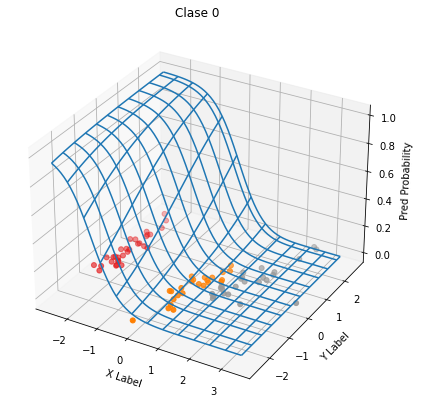

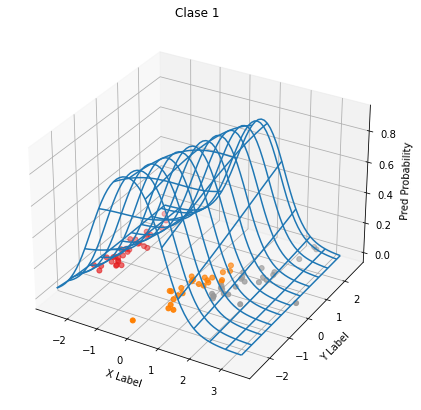

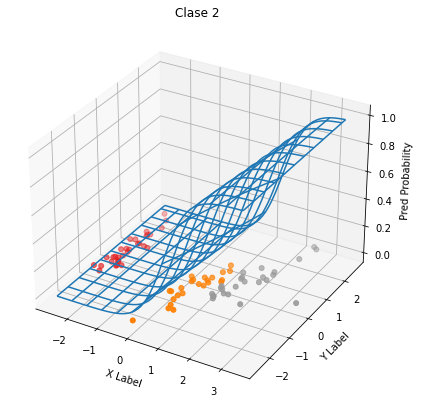

In [7]:
def  plot_belief_model(l, X, y ,xlabel ,ylabel ,n):

    X = X[:n]
    y = y[:n]

    min1, max1 = X[:, 0].min(), X[:, 0].max() #1st feature
    min2, max2 = X[:, 1].min(), X[:, 1].max() #2nd feature
    x1_scale = np.arange(min1, max1, 0.1)
    x2_scale = np.arange(min2, max2, 0.1)
    x_grid, y_grid = np.meshgrid(x1_scale, x2_scale)

    x_g, y_g = x_grid.flatten(), y_grid.flatten()
    x_g, y_g = x_g.reshape((len(x_g), 1)), y_g.reshape((len(y_g), 1))
    grid = np.hstack((x_g, y_g))
    n_classes = np.unique(y).size

    z_axis = np.ones((n,1))*0.5

    l.fit(X, y)
    y_pred = l.predict(X)
    p_pred_ = l.predict_proba(grid)
    p_pred_array = np.array(p_pred_)

    for i in range(n_classes) :


        p_pred = p_pred_[:, i]
        pp_grid = p_pred.reshape(x_grid.shape)
        fig = plt.figure(figsize=(7,7))
        ax = fig.add_subplot(  projection='3d', )

        # Wireframe
        ax.plot_wireframe(x_grid, y_grid, pp_grid, rstride=5, cstride=5, cmap='Set1')
        ax.set_title( "Clase %d" % i)
        
        #scatter
        plt.scatter(X[:, 0], X[:, 1], cmap='Set1', c = y_pred,  s=25)

        ax.set_xlabel(xlabel)
        ax.set_ylabel(ylabel)
        ax.set_zlabel("Pred Probability")



        plt.show()

X, X_test, y, y_test = sklearn.model_selection.train_test_split(iris_X, iris_y)

scaled_features = StandardScaler().fit_transform(X)
pca = PCA(n_components=2)
X = pca.fit_transform(scaled_features)

plot_belief_model(LogisticRegression(), X, y ,"X Label" ,"Y Label" , 80)

In [9]:
def plot_all_classes(l, X, y ,xlabel ,ylabel ,n=20):

    X = X[:n]
    y = y[:n]    
    z_axis = np.ones((n,1))*0.5

    min1, max1 = X[:, 0].min(), X[:, 0].max() 
    min2, max2 = X[:, 1].min(), X[:, 1].max() 

    M1=np.linspace(min1,max1,n)
    M2=np.linspace(min2,max2,n)
    
    #matrix
    z = np.zeros((n,n))
    
    l.fit(X,y)
    probs=l.predict_proba(X)
    probs=np.array(probs)
    
    x_grid,y_grid=np.meshgrid(M1,M2)

    fig = plt.figure(figsize=(15,15))
    ax = fig.add_subplot(projection='3d')
    ax.scatter(X[:,0], X[:,1],z_axis, cmap='Set1', s=25, c = probs)
    colors = ['red', 'green','blue','purple']
    for i in range(l.classes_.size):
        ax.plot_wireframe(x_grid, y_grid,  z_axis * probs[:,i], color=colors[i], rstride=1, cstride=1)
        ax.set_xlabel(xlabel)
        ax.set_ylabel(ylabel)
        ax.set_zlabel("Predict Probability")
    plt.title("Wireframe with complete classes")
    plt.show()

2

## **Exercise 3(1 points)**  
Consider the datasets prnn_synth, iris (once binary setosa vs. rest and once with the original labels), window, wine, digits, and breast_cancer. For each dataset,create a PCA projection into the 2D plane, and use the above function with LogisticRegression.You should obtain 4 figures in total. Are the decision surfaces reasonable?

**iris**

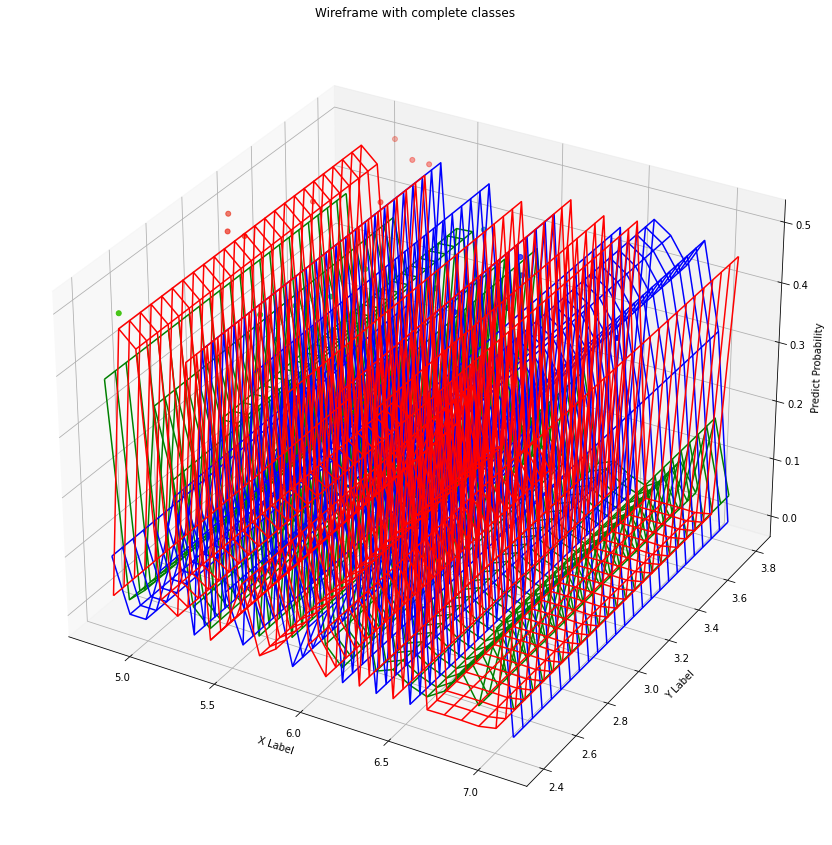

In [10]:
X, X_test, y, y_test = sklearn.model_selection.train_test_split(iris_X, iris_y)
plot_all_classes(LogisticRegression(),X,y,xlabel="X Label",ylabel="Y Label",n = 25)

Iris Binaria

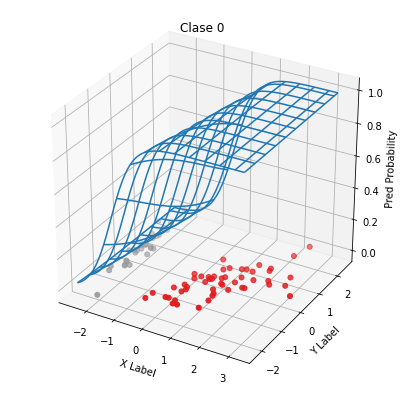

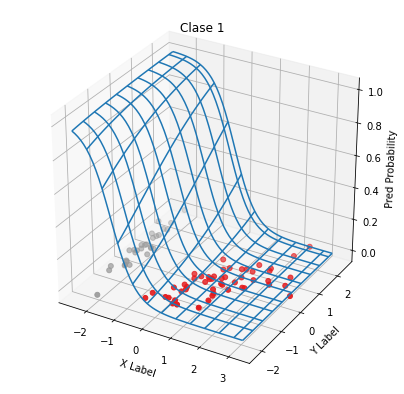

In [ ]:
X, X_test, y, y_test = sklearn.model_selection.train_test_split(iris_X, iris_bin_y)

scaled_features = StandardScaler().fit_transform(X)
pca = PCA(n_components=2)
X = pca.fit_transform(scaled_features)

plot_belief_model(LogisticRegression(), X, y ,"X Label" ,"Y Label" , 80)

Wine

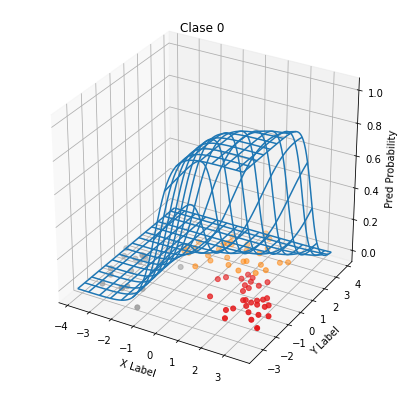

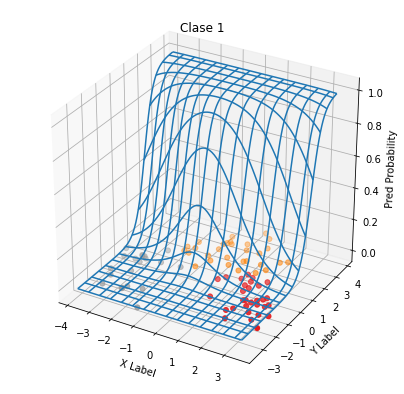

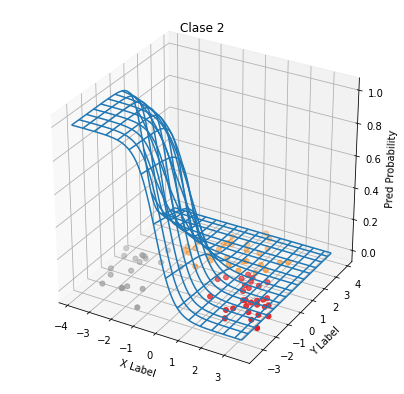

In [ ]:
X, X_test, y, y_test = sklearn.model_selection.train_test_split(wine_X, wine_y)

scaled_features = StandardScaler().fit_transform(X)
pca = PCA(n_components=2)
X = pca.fit_transform(scaled_features)

plot_belief_model(LogisticRegression(), X, y ,"X Label" ,"Y Label" , 80)

In [ ]:
X, X_test, y, y_test = sklearn.model_selection.train_test_split(wine_X, wine_y)
#plot_all_classes(LogisticRegression(),X,y,xlabel="X Label",ylabel="Y Label",n = 25)

Breast

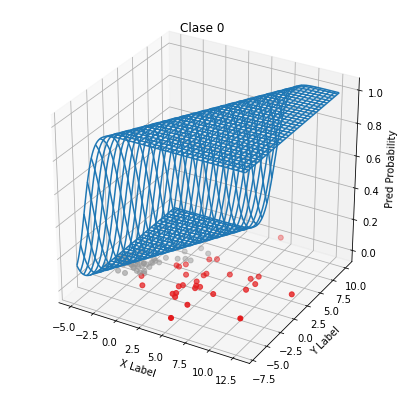

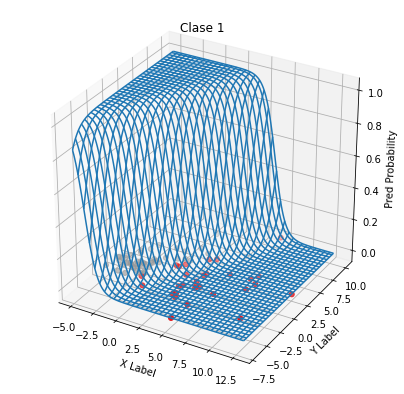

In [ ]:
X, X_test, y, y_test = sklearn.model_selection.train_test_split(breast_X, breast_y)

scaled_features = StandardScaler().fit_transform(X)
pca = PCA(n_components=2)
X = pca.fit_transform(scaled_features)

plot_belief_model(LogisticRegression(), X, y ,"X Label" ,"Y Label" , 80)

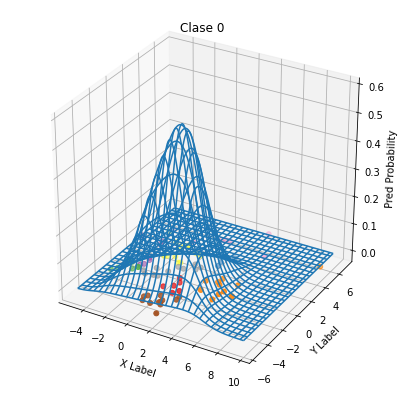

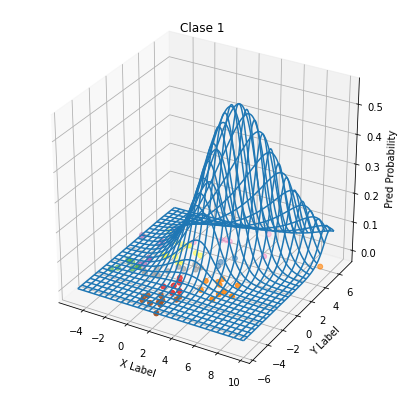

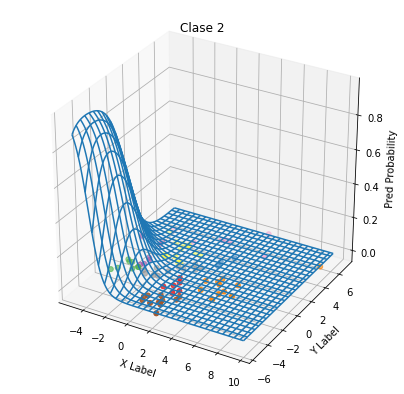

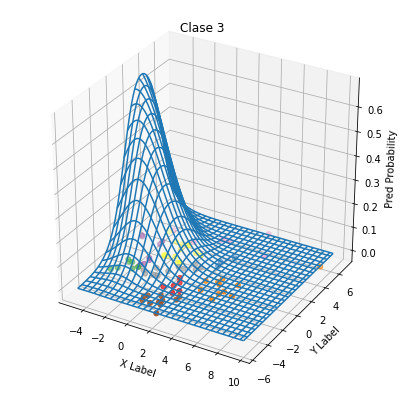

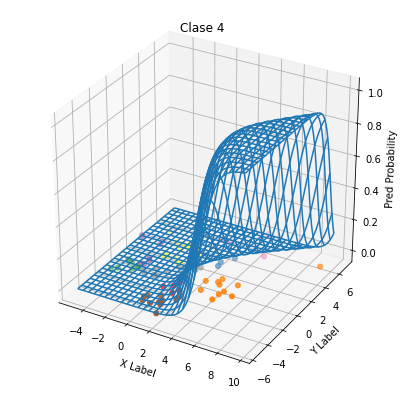

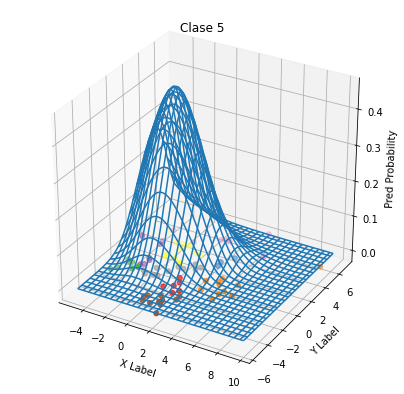

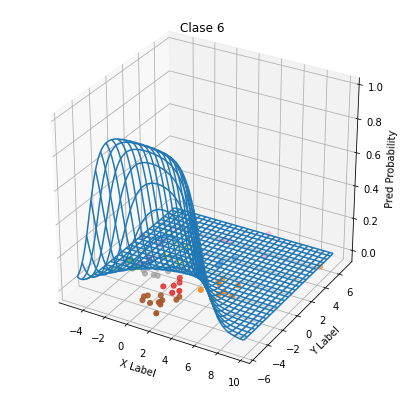

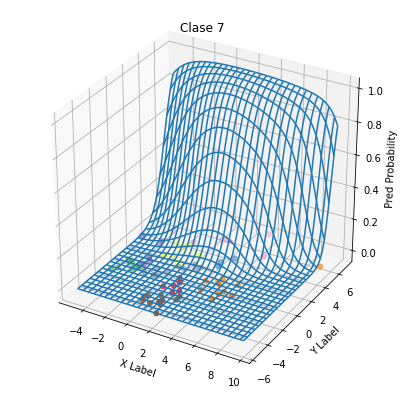

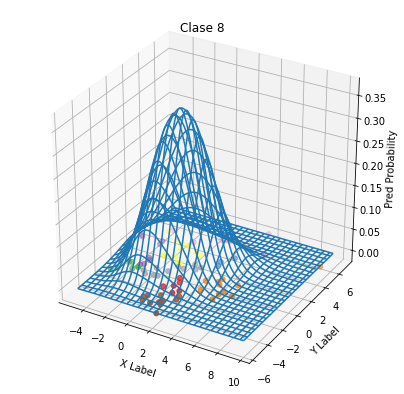

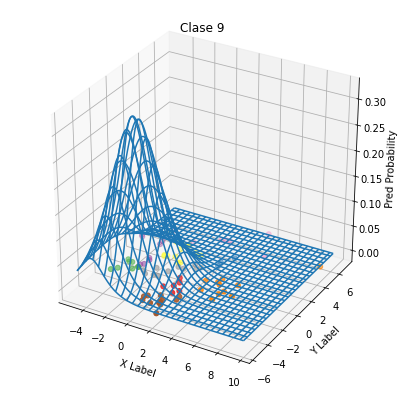

In [ ]:
X, X_test, y, y_test = sklearn.model_selection.train_test_split(digits_X, digits_y)

scaled_features = StandardScaler().fit_transform(X)
pca = PCA(n_components=2)
X = pca.fit_transform(scaled_features)

plot_belief_model(LogisticRegression(), X, y ,"X Label" ,"Y Label" , 80)

**prnn_synth**

In [ ]:
prnn_df = pd.read_csv('/content/prnn_synth.csv')
prnn_df
prnn_X = prnn_df.drop(columns = "yc")
prnn_y = prnn_df['yc']

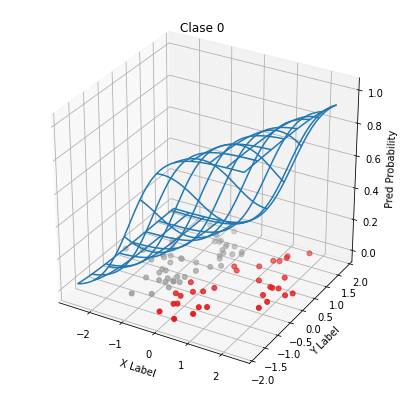

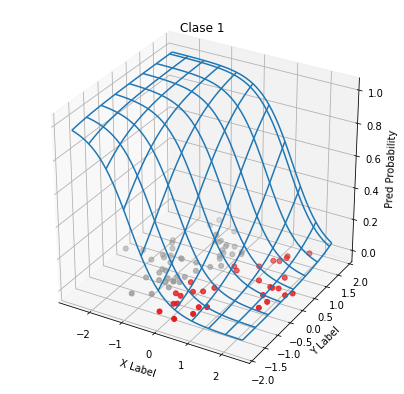

In [ ]:
X, X_test, y, y_test = sklearn.model_selection.train_test_split(prnn_X, prnn_y)

scaled_features = StandardScaler().fit_transform(X)
pca = PCA(n_components=2)
X = pca.fit_transform(scaled_features)

plot_belief_model(LogisticRegression(), X, y ,"X Label" ,"Y Label" , 80)

Window

In [ ]:
window_df = pd.read_csv('/content/window.csv')
#window_df

window_X = window_df.drop(columns = "Class")
window_y = window_df['Class']

In [ ]:
X, X_test, y, y_test = sklearn.model_selection.train_test_split(window_X, window_y)

scaled_features = StandardScaler().fit_transform(X)
pca = PCA(n_components=2)
X = pca.fit_transform(scaled_features)

#plot_belief_model(LogisticRegression(), X, y ,"X Label" ,"Y Label" , 80)

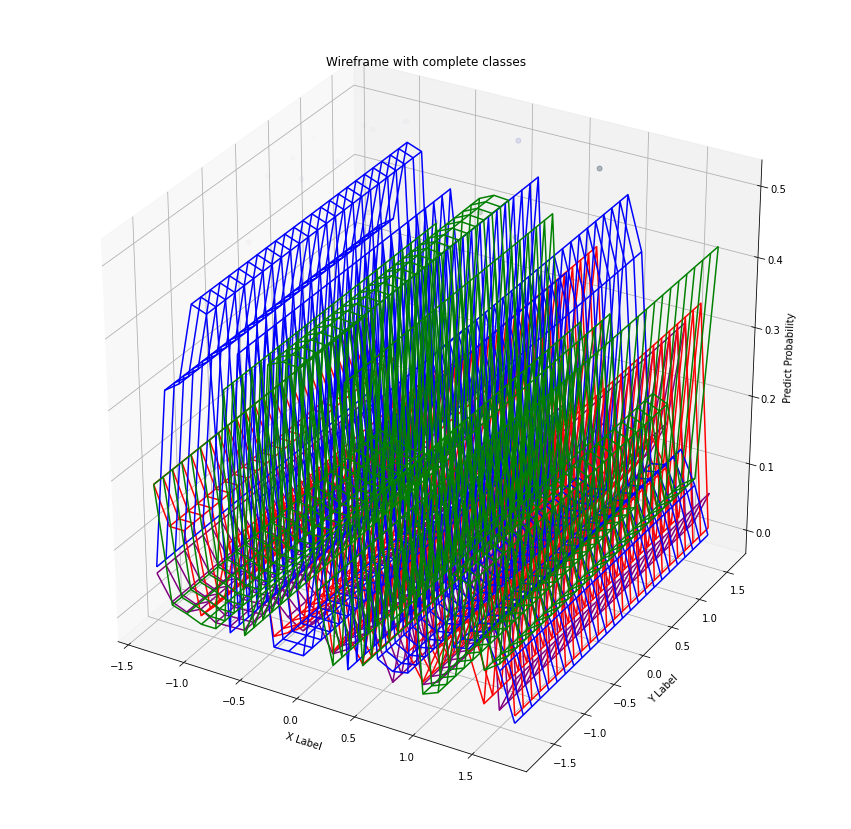

In [ ]:
plot_all_classes(LogisticRegression(),X,y,xlabel="X Label",ylabel="Y Label",n = 25)

En conclusión si hacen sentido las superficies de decisión, esto se puede ver con el Wireframe ya que cuando hay puntos con determinada clase, en el gráfico se ve que la superficie busca capturar la gran mayoría dichos puntos que pertenecen a la clase.